In [1]:
import pandas as pd
import dask.dataframe as dd

In [24]:
# Read the CSV file into a Dask DataFrame
df_sun = dd.read_csv("../features/1775_2024_cor_sunshine_features.csv")
df_sun.head()

,id,cor_kwh_sunshine,year_month
0,002da9d5719ff5fb0f53307ace9bc9e7,-0.005999,2023-01
1,00327776181f90b1864c4238857098b7,-0.017045,2023-01
2,006d406397f66e3feb64e50853668cb6,-0.063781,2023-01
3,00bd7e4f354fec1559d7ee2bb41e197f,0.017763,2023-01
4,00bfdb2a5b43bb6bfce84e24c81ffdcf,-0.002112,2023-01


In [25]:
# Read the CSV file into a Dask DataFrame
df_tmp = dd.read_csv("../features/1775_2023_cor_temp_features.csv")
df_tmp.head()

,id,cor_kwh_temp,year_month
0,002da9d5719ff5fb0f53307ace9bc9e7,-0.181985,2023-01
1,00327776181f90b1864c4238857098b7,-0.027829,2023-01
2,006d406397f66e3feb64e50853668cb6,-0.009993,2023-01
3,00bd7e4f354fec1559d7ee2bb41e197f,-0.203527,2023-01
4,00bfdb2a5b43bb6bfce84e24c81ffdcf,0.160405,2023-01


In [26]:
df_stl = dd.read_csv("../features/1775_2023_stl_features.csv")
df_stl.head()

,id,year_month,stl_0,stl_1,stl_2,stl_3,stl_4,stl_5,stl_6,stl_7,...,stl_14,stl_15,stl_16,stl_17,stl_18,stl_19,stl_20,stl_21,stl_22,stl_23
0,ada3c59761422f60162dd6ea3a7033b1,2023-01,0.673540,0.573044,0.472098,0.371925,0.265941,0.190831,0.151612,0.138649,...,0.120281,0.159072,0.193494,0.220389,0.223524,0.204265,0.206945,0.211396,0.218094,0.228994
1,ada3c59761422f60162dd6ea3a7033b1,2023-02,0.702000,0.593429,0.484305,0.376086,0.266409,0.178076,0.127380,0.109365,...,0.150476,0.188221,0.228046,0.257988,0.263845,0.240433,0.212284,0.185636,0.159272,0.134920
2,ada3c59761422f60162dd6ea3a7033b1,2023-03,0.906597,0.779381,0.649489,0.518905,0.380011,0.261676,0.188031,0.154823,...,0.076706,0.090930,0.110593,0.132012,0.142219,0.137893,0.130705,0.123317,0.115761,0.108918
3,ada3c59761422f60162dd6ea3a7033b1,2023-04,0.979244,0.783832,0.594719,0.412280,0.236921,0.144208,0.107940,0.114306,...,0.096461,0.118647,0.144259,0.156275,0.155565,0.150665,0.150440,0.152826,0.156526,0.161682
4,ada3c59761422f60162dd6ea3a7033b1,2023-05,0.928659,0.742726,0.563572,0.391446,0.226842,0.145613,0.114841,0.118866,...,0.086589,0.108681,0.127530,0.129527,0.113166,0.090197,0.076107,0.063280,0.051882,0.042230


In [37]:
df_mean = dd.read_csv("../features/1775_2023_mean_hour_day.csv")
# bring the header to one row
df_mean.head()

,id,year_month,0,1,2,3,4,5,6,7,...,14,15,16,17,18,19,20,21,22,23
0,4e63a09571e4812bfba4e6cbcadfae01,2023-11,0.181758,0.026542,0.123542,0.045100,0.051350,0.241517,0.057367,0.076575,...,0.089933,0.072050,0.070783,0.210067,0.199442,0.155992,0.129342,0.103400,0.101183,0.680450
1,7ae091b442072e9bc7a70efd623001f7,2023-09,0.330133,0.838658,0.238683,0.131117,0.073392,0.023908,0.029175,0.029192,...,0.034167,0.035975,0.037308,0.035992,0.037917,0.035992,0.031008,0.027317,0.023958,0.022417
2,e22ed1d346c23bb526f002a94a346aca,2023-04,0.084883,0.114783,0.140750,0.137000,0.108342,0.065492,0.093158,0.135892,...,0.092500,0.106692,0.169350,0.198783,0.115567,0.115758,0.096150,0.058783,0.051425,0.079617
3,13e07e9c813b90350ccab15bcbbbe25d,2023-12,0.014677,0.014032,0.014629,0.014621,0.014589,0.016137,0.015290,0.017782,...,0.018202,0.020121,0.021831,0.020927,0.020823,0.023887,0.027831,0.028702,0.021435,0.014129
4,f025df5754f4ea912bf635cacca1e138,2023-09,0.268917,0.030333,0.045833,0.034917,0.029833,0.018667,0.019583,0.018083,...,0.019083,0.020250,0.018667,0.018250,0.017833,0.017167,0.017500,0.016750,0.016417,0.024500


In [57]:
# Join the DataFrames
df_feat = dd.merge(df_sun, df_tmp, on=["id", "year_month"])
# df_feat = dd.merge(df_feat, df_stl, on=['id','year_month'])
df_feat = dd.merge(df_feat, df_mean, on=["id", "year_month"])
df_feat.head()

,id,cor_kwh_sunshine,year_month,cor_kwh_temp,0,1,2,3,4,5,...,14,15,16,17,18,19,20,21,22,23
0,002da9d5719ff5fb0f53307ace9bc9e7,-0.005999,2023-01,-0.181985,0.629468,2.062040,2.034331,2.055927,0.603403,0.573677,...,0.670210,0.776315,0.757040,0.048879,0.021815,1.248726,0.891992,0.094976,1.058484,0.880452
1,00327776181f90b1864c4238857098b7,-0.017045,2023-01,-0.027829,0.330113,0.172097,0.018452,0.063815,0.068903,0.108774,...,0.028040,0.025565,0.027161,0.028355,0.026653,0.025315,0.018726,0.041919,0.182903,0.120339
2,006d406397f66e3feb64e50853668cb6,-0.063781,2023-01,-0.009993,0.080823,0.081452,0.083097,0.086903,0.092806,0.092242,...,0.116581,0.105234,0.108194,0.089944,0.088629,0.084290,0.076387,0.107468,0.093653,0.080823
3,00bd7e4f354fec1559d7ee2bb41e197f,0.017763,2023-01,-0.203527,0.121581,0.424871,0.303185,0.268879,0.423702,0.189831,...,0.281895,0.298323,0.294468,0.023484,0.012766,0.696669,0.424887,0.030040,0.517798,0.285774
4,00bfdb2a5b43bb6bfce84e24c81ffdcf,-0.002112,2023-01,0.160405,0.037097,0.028548,0.018548,0.018871,0.017903,0.017661,...,0.030000,0.051129,0.049113,0.048468,0.046935,0.043548,0.036532,0.029274,0.031532,0.037097


In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [88]:
# Filter the DataFrame for a specific yae_month
df_feat_month = df_feat[df_feat["year_month"] == "2023-08"]
# Sort df_feat by id
df_feat_month = df_feat_month.sort_values(by="id")

# Dropping non-numerical columns for the sake of normalization
# You may want to exclude columns like 'id', 'year_month' before normalization
df_numeric = df_feat_month.drop(columns=["id", "year_month"])

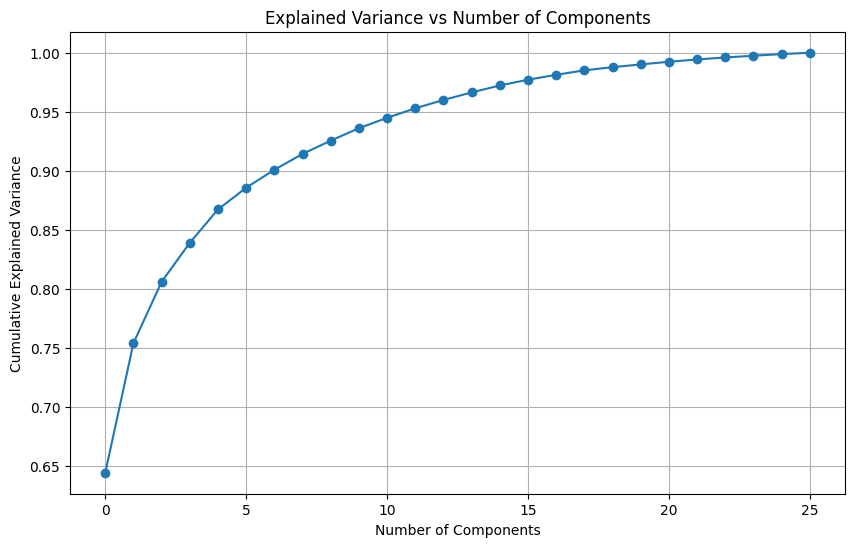

In [90]:
# 1. Row-wise normalization (Min-Max Scaling)
scaler = MinMaxScaler()

# Convert Dask DataFrame to Pandas DataFrame
df_numeric_pd = df_numeric.compute()

# Apply scaling row-wise
df_normalized = pd.DataFrame(
    scaler.fit_transform(df_numeric_pd.T).T, columns=df_numeric_pd.columns
)

# 2. PCA for Dimensionality Reduction
# Fitting PCA and checking explained variance for each component
pca = PCA()
pca.fit(df_normalized)

# Plot the explained variance to find the optimal number of components
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker="o")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs Number of Components")
plt.grid(True)
plt.show()

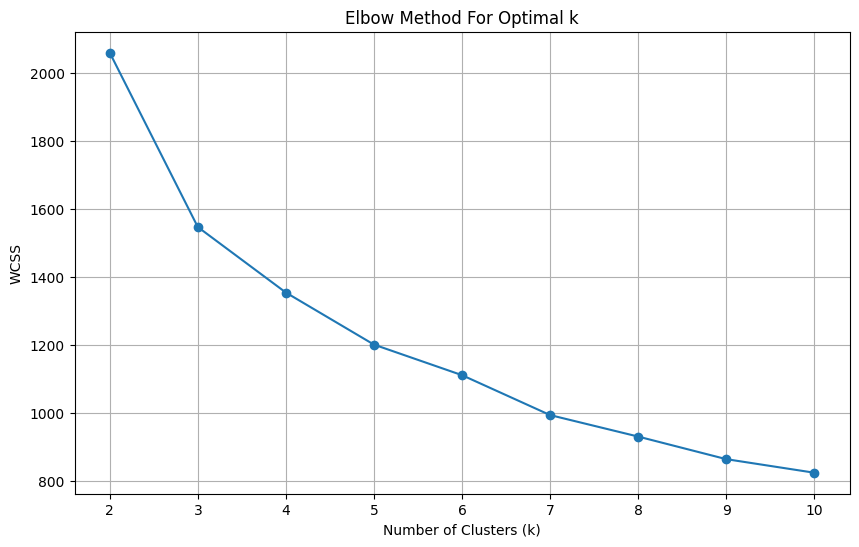

In [93]:
# Chose 10 components
pca_components = 10

pca = PCA(n_components=pca_components)
df_pca = pca.fit_transform(df_normalized)

wcss = []  # Within-cluster sum of squares (for the elbow method)
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS
    silhouette_avg = silhouette_score(df_pca, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Plot the WCSS to see the elbow point
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), wcss, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method For Optimal k")
plt.grid(True)
plt.show()

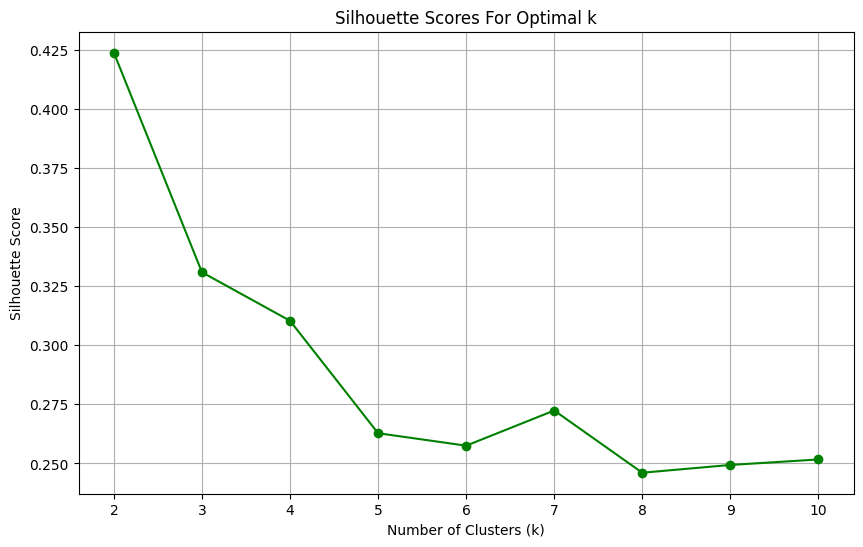

In [94]:
# Plot silhouette scores for each k
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker="o", color="green")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores For Optimal k")
plt.grid(True)
plt.show()

In [95]:
# Fit the final KMeans model
k_mean_clusters = 5
kmeans_final = KMeans(n_clusters=k_mean_clusters, random_state=42)

df_pred = df_feat_month.compute()
df_pred["cluster"] = kmeans_final.fit_predict(df_pca)

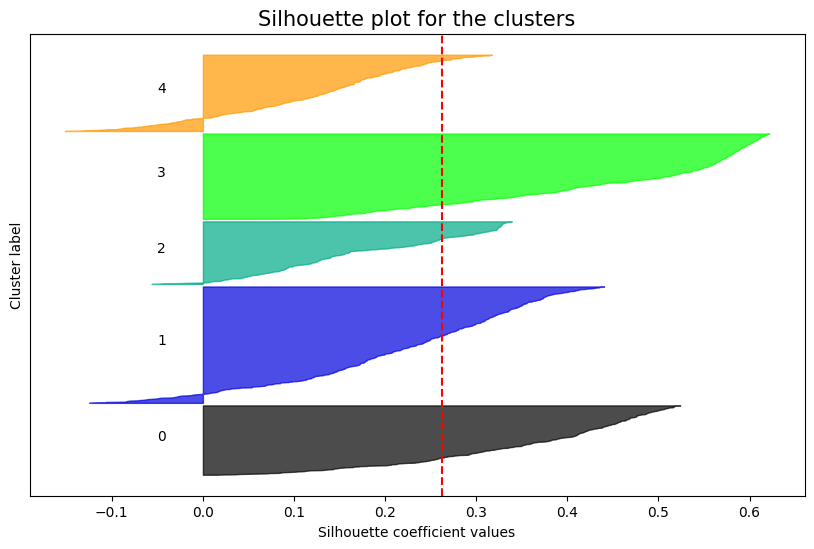

In [96]:
from sklearn.metrics import silhouette_samples, silhouette_score

# 2. Calculate the silhouette scores for each sample
silhouette_avg = silhouette_score(df_pca, df_pred["cluster"])
sample_silhouette_values = silhouette_samples(df_pca, df_pred["cluster"])

# 3. Create a silhouette plot
fig, ax = plt.subplots(figsize=(10, 6))

y_lower = 10  # Starting y-axis position
for i in range(k_mean_clusters):
    # Aggregate the silhouette scores for the samples in this cluster
    ith_cluster_silhouette_values = sample_silhouette_values[df_pred["cluster"] == i]

    # Sort the silhouette values for better visualization
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    # Fill between y_lower and y_upper with silhouette scores
    color = plt.cm.nipy_spectral(float(i) / k_mean_clusters)
    ax.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    # Label the silhouette plots with cluster numbers
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for spacing between plots

# Set labels and title
ax.set_title("Silhouette plot for the clusters", fontsize=15)
ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster label")

# Add a vertical line for the average silhouette score of all points
ax.axvline(x=silhouette_avg, color="red", linestyle="--")

# Remove y-axis labels for clarity
ax.set_yticks([])

plt.show()

In [126]:
# Plot the cunsunption for each cluster ----------------------------------------
df_pre_n = df_normalized.drop(columns=["cor_kwh_sunshine", "cor_kwh_temp"])
df_pre_n["cluster"] = df_pred["cluster"]

In [127]:
# 1. Group by cluster and calculate the mean of each numerical feature
df_pred_p = df_pre_n
cluster_means = df_pred_p.groupby("cluster").mean()

In [128]:
# 2. Plot each cluster's real values (grey lines) and the mean values (red line)
num_clusters = df_pred_p["cluster"].nunique()  # Total number of clusters
num_features = df_pred_p.shape[1]  # Total number of features
num_features

25

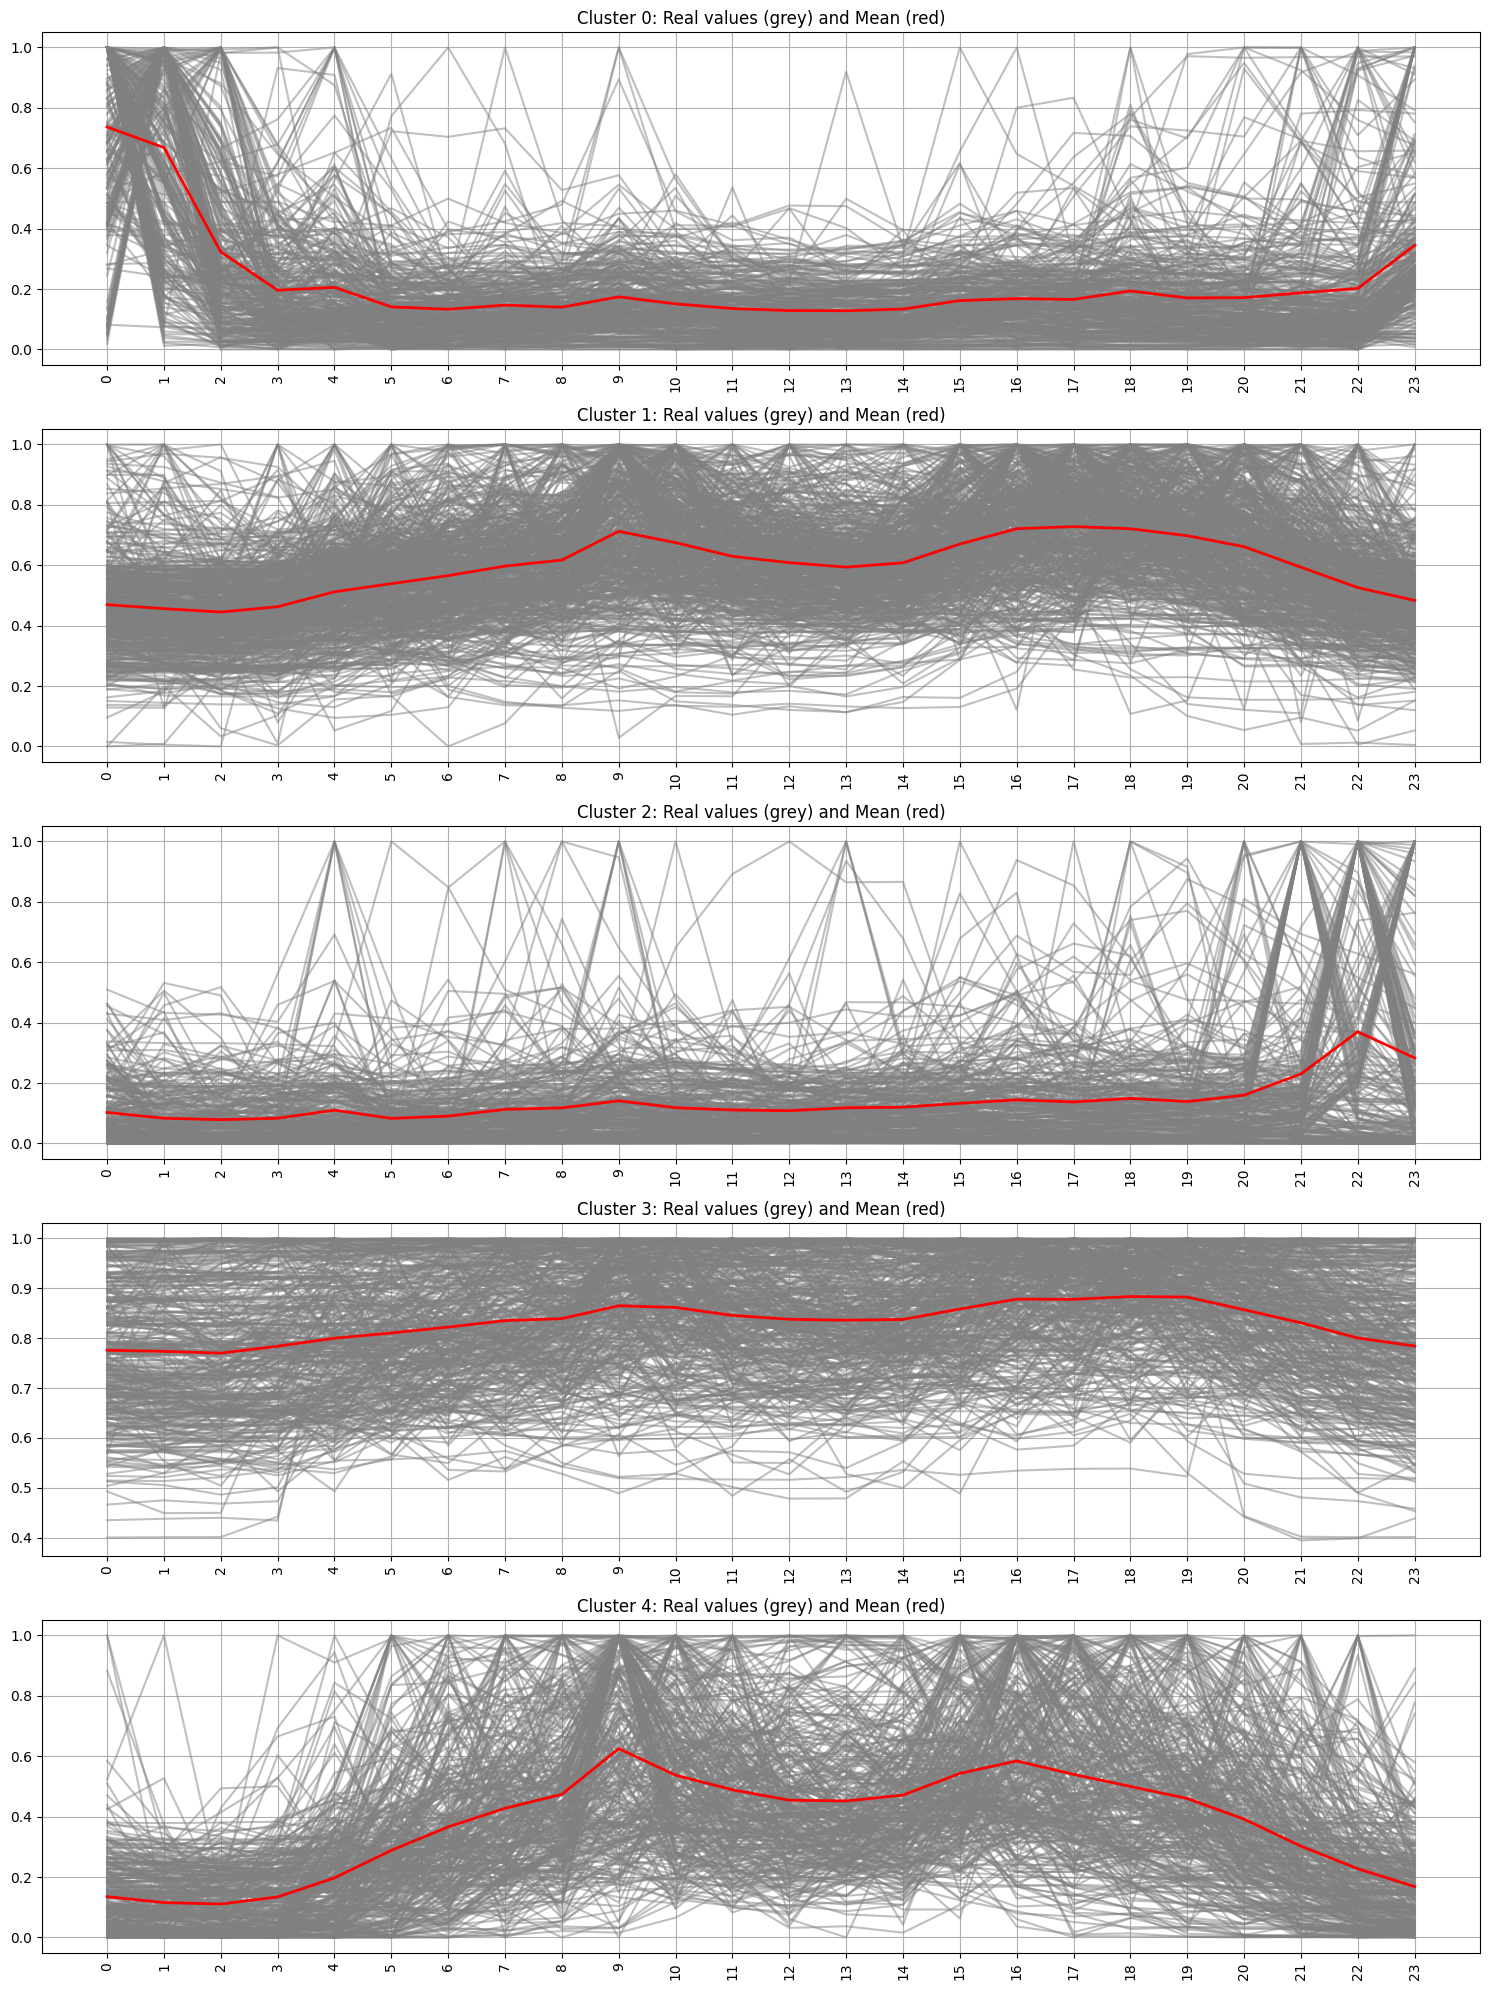

In [129]:
plt.figure(figsize=(15, num_clusters * 4))  # Adjust figure size according to number of clusters

# Loop through each cluster and plot the values
for cluster in range(num_clusters):
    plt.subplot(num_clusters, 1, cluster + 1)

    # Get the data points belonging to the current cluster
    cluster_data = df_pred_p[df_pred_p["cluster"] == cluster]
    # Drop the 'cluster' column
    cluster_data = cluster_data.drop(columns="cluster")

    # Plot each individual data point's feature values (grey lines)
    for i in range(cluster_data.shape[0]):
        plt.plot(cluster_data.columns, cluster_data.iloc[i, :], color="grey", alpha=0.5)

    # Plot the mean feature values for the current cluster (red line)
    plt.plot(
        cluster_data.columns,
        cluster_means.iloc[cluster, :],
        color="red",
        linewidth=2,
        label=f"Cluster {cluster} Mean",
    )

    # Set plot title and labels!
    plt.title(f"Cluster {cluster}: Real values (grey) and Mean (red)")
    plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
    plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()